In [1]:
from IPython.display import Image

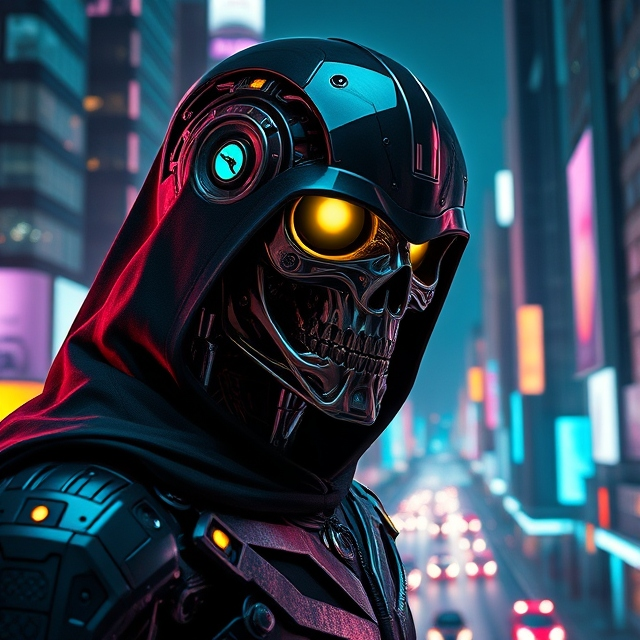

In [2]:
Image(filename = 'Simple-Agent.jpeg')

# Simple Agent

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

License: [Apache-2.0](https://github.com/mytechnotalent/Simple-Agent/blob/main/LICENSE)

## Install Libraries

In [3]:
!pip install llama-index-core llama-index-readers-file llama-index-llms-ollama llama-index-embeddings-huggingface

## Install & Run Ollama

In [4]:
import os
import platform
import subprocess


def install_and_manage_ollama():
    """Install and manage Ollama on various OS plaforms."""

    # detect system
    system = platform.system()

    # detect, install and run Ollama on respective OS platform
    try:
        if system == "Darwin":
            print("Detected macOS. Checking if Ollama is installed...")
            if subprocess.run(['which', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE).returncode != 0:
                print("Installing Ollama on macOS using Homebrew...")
                os.system("brew install ollama")
            else:
                print("Ollama is already installed.")
        elif system == "Linux":
            print("Detected Linux. Checking if Ollama is installed...")
            if subprocess.run(['which', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE).returncode != 0:
                print("Installing Ollama on Linux...")
                os.system("curl -sSL https://ollama.com/install | sh")
            else:
                print("Ollama is already installed.")
        elif system == "Windows":
            print("Detected Windows.")
            print("Please download and install Ollama manually from https://ollama.com.")
            return
        else:
            print("Unsupported operating system. Exiting.")
            return
        print("Managing Ollama process...")
        if system in ["Darwin", "Linux"]:
            result = subprocess.run(['pgrep', '-f', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
            if result.stdout:
                pid = result.stdout.strip()
                print(f"Found running Ollama process with PID: {pid}. Killing it...")
                os.system(f"kill -9 {pid}")
            else:
                print("No Ollama process found running.")
            print("Starting ollama serve in the background...")
            subprocess.Popen(['ollama', 'serve'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, preexec_fn=os.setpgrp)
            print("ollama serve is now running in the background.")
        else:
            print("Automatic management of Ollama is not supported on Windows. Please run Ollama manually.")
            return
    except Exception as e:
        print(f"An error occurred: {e}")
        return


# run the function
install_and_manage_ollama()

Detected macOS. Checking if Ollama is installed...
Ollama is already installed.
Managing Ollama process...
Found running Ollama process with PID: 84768
86693. Killing it...
Starting ollama serve in the background...
ollama serve is now running in the background.


sh: line 1: 86693: command not found


## Obtain `mixtral:8x7b` Model

In [5]:
import platform
import subprocess


def run_ollama_mixtral():
    """Obtain mixtral:8x7b model from Ollama."""

    # detect system
    system = platform.system()

    # detect and obtain mixtral:8x7b model on respective OS platform
    try:
        if system in ["Darwin", "Linux"]:  
            print(f"Detected {system}. Running ollama mixtral:8x7b...")
            if subprocess.run(['which', 'ollama'], stdout=subprocess.PIPE, stderr=subprocess.PIPE).returncode != 0:
                print("Ollama is not installed. Please install it and try again.")
                return
            result = subprocess.run(['ollama', 'run', 'mixtral:8x7b'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
            if result.returncode == 0:
                print("Command executed successfully.")
            else:
                print("Failed to execute the command:")
                print(result.stderr)
        elif system == "Windows":
            print("Detected Windows.")
            print("Please run the following command manually in your terminal:")
            print("`ollama run mixtral:8x7b`")
            return
        else:
            print("Unsupported operating system. Exiting.")
            return
    except Exception as e:
        print(f"An error occurred: {e}")
        return


# run the function
run_ollama_mixtral()

Detected Darwin. Running ollama mixtral:8x7b...
Command executed successfully.


## Register Tools w/ `ReactAgent`

In [6]:
from llama_index.core.agent import ReActAgent
from llama_index.llms.ollama import Ollama
from llama_index.core.tools import FunctionTool


def factorial(n: int) -> int:
    """Calculate the factorial of a number."""
    if n == 0:
        return 1
    return n * factorial(n - 1)


def is_prime(n: int) -> bool:
    """Check if a number is prime."""
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True


factorial_tool = FunctionTool.from_defaults(fn=factorial)
is_prime_tool = FunctionTool.from_defaults(fn=is_prime)

llm = Ollama(model="mixtral:8x7b", request_timeout=300.0)
agent = ReActAgent.from_tools(
    [factorial_tool, is_prime_tool], 
    llm=llm, 
    verbose=True, 
    max_iterations=10  # increase from the default (usually 3-5)
)

## Chat w/ Agent

In [7]:
response = agent.chat("What is the factorial of 5? Calculate step by step detailing all of your thought process.")
print(response)

> Running step 4d8f9068-906a-4486-afcf-e00f122c5a84. Step input: What is the factorial of 5? Calculate step by step detailing all of your thought process.
Thought: The current language of the user is English. They want to know the factorial of 5 and also want to see a step-by-step calculation. I can use the 'factorial' tool to find the factorial of 5, but I also need to manually calculate it for demonstration purposes.
Action: No
Action Input: {'n': 5}
Observation: Error: No such tool named `No`.
> Running step 73e48c92-2ed0-4d26-a27c-4506b658f9b4. Step input: None
Thought: The user received an error because there is no "No" tool. I should have written "No tool" instead. I will clarify this in my next message and then show the step-by-step calculation of the factorial of 5.
Answer: I'm sorry for the confusion. I made a mistake in my previous response by mentioning "No" as the action. To answer your question, let's manually calculate the factorial of 5 (denoted as 5!). The factorial of 

In [8]:
response = agent.chat("Is 29 a prime number? Calculate step by step detailing all of your thought process.")
print(response)

> Running step 8295ef74-8fea-4936-ae7a-17eb52aecf5e. Step input: Is 29 a prime number? Calculate step by step detailing all of your thought process.
Thought: (Implicit) I can answer without any more tools!
Answer: To determine if a number is prime, we need to check if it has any divisors other than 1 and itself. Here's the step-by-step calculation for checking if 29 is a prime number:

1. Start with the number 2 (the smallest possible prime factor).
2. Check if 2 is a divisor of 29 (i.e., 29 % 2 == 0). If it is, then 29 is not a prime number because it has a divisor other than 1 and itself. However, in this case, 29 % 2 != 0, which means that 2 is not a divisor of 29.
3. Move on to the next possible prime factor, which is 3. Check if 3 is a divisor of 29 (i.e., 29 % 3 == 0). Again, in this case, 29 % 3 != 0, so 3 is not a divisor of 29.
4. Continue checking for higher prime factors up to the square root of 29 (approximately 5.39). Since none of them are divisors of 29, we can conclude 